In [1]:
# 대한민국 20세 이상 남성 평균 키 : 173cm 
# 귀무가설 : 멀티캠퍼스 남학생의 평균 키는 173cm이다 
# 대립가설 : 멀티캠퍼스 남학생의 평균 키는 173cm 아니다

In [3]:
import numpy as np 
from scipy import stats 

In [4]:
# 난수 발생 >> seed 값 설정 (코드 실행시 마다 동일한 난수 발생 위함)

np.random.seed(42)

In [7]:
# 평균 178, 표준편차 5로 임의의 키(heights) 20개 생성 

heights = [178 + np.random.normal(0, 5) for _ in range(20)] 
heights

[181.69233289997706,
 178.85684140594987,
 177.4217585880588,
 176.49448152205355,
 170.60739004816287,
 174.40077895802645,
 175.69680614520107,
 183.28561113109458,
 179.7180914478423,
 169.18479922318633,
 179.620419846974,
 176.07458859791842,
 174.61538999847022,
 181.05838144420434,
 183.15499761247975,
 182.656400595581,
 173.8039123838868,
 176.4539381207439,
 179.6563171570178,
 182.8777256356118]

In [13]:
# t 검정 수행 

stats.ttest_1samp(heights, 173)
_ttest = stats.ttest_1samp(heights, 173)
_ttest

Ttest_1sampResult(statistic=5.302777860836891, pvalue=4.0609320531693456e-05)

In [10]:
# 결과 해석 
# p-value(유의확률)가  0.00004  < 0.05(alpha, 유의수준)보가 작으므로 귀무가설 기각. 대립가설 채택.
# 즉, 멀티캠퍼스 남학생의 평균은 178(표준편차=5)은 대한민국 20세 이상 남학생 키 평균과 차이가 있다.

In [16]:
# 결과출력 

print("The T-statistics is %.3f and the p-value is %.3f"% _ttest)

The T-statistics is 5.303 and the p-value is 0.000


#### 혼동행렬(반드시 시험에 나옴 **** )

In [35]:
import numpy as np 
import sklearn.metrics as metrics 

# 0 : 정상(암 없음) , 1 : 암환자 
y = np.array([1,1,1,1,0,0]) # 실제 관측값 
p = np.array([1,1,1,0,0,0]) # 예측 값 

In [36]:
# 정확도, 정밀도, 재현율, f-1 score 

In [37]:
print('accuracy:', metrics.accuracy_score(y, p)) 
# 정확도는 0.83 (83%)

accuracy: 0.8333333333333334


In [38]:
print('precision:', metrics.precision_score(y, p))
# 정밀도는 1.0 (100%)

precision: 1.0


In [39]:
print('recall:', metrics.recall_score(y, p))
# 재현율은 0.75(75%)

recall: 0.75


In [40]:
print('f1:', metrics.f1_score(y,p))
# f1 score는 0.857 (86%)

f1: 0.8571428571428571


In [43]:
# 정확도, 정밀도, 재현율, f1-score 한 번에 출력 (***)

print(metrics.classification_report(y, p))
print(metrics.confusion_matrix(y, p))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.75      0.86         4

    accuracy                           0.83         6
   macro avg       0.83      0.88      0.83         6
weighted avg       0.89      0.83      0.84         6

[[2 0]
 [1 3]]


In [44]:
# acc 

(2+3) / (2+0+1+3)

0.8333333333333334

In [45]:
# precistion( 기준 : predict >> True)
2/2

1.0

In [46]:
# recall (기준 : actual >> True)
3/4

0.75

#### ROC curve 

- 특_이도(x축, False Positive Rate : FRR) : 틀_린 것을 틀_렸다고 예측하는 것 (틀틀틀 >> x)
- 민_감도(y축, 재현율, True Positive Rate : TRR) : 맞_은 것을 맞_다고 예측하는 것 (맞맞막 >> y)

In [47]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [48]:
from sklearn.datasets import make_classification 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

In [81]:
# roc curve 함수 정의 
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0,1],[0,1],  color='darkblue', linestyle='--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.legend()
    plt.show()

In [69]:
# 샘플 데이터 1000건 생성 

data_x, class_label = make_classification(n_samples=1000, n_classes=2, 
                                           weights=[1,1], random_state=42)

In [70]:
train_x, test_x, train_y, test_y = train_test_split(data_x, class_label, 
                                                    test_size=0.3, random_state=42) 

In [71]:
# 모델링 (학습 데이터를 앙상블 모형 중 랜덤포레스트 모델에 적용)

model = RandomForestClassifier()
model.fit(train_x, train_y) 
# fit : 모델을 학습하기 적합하게 만들어 >> 모델 생성 
# 반드시 모델 구축시에는 train data 사용해야 함 

RandomForestClassifier()

In [72]:
# 예측 값(확률)>> test data로 예측 

probs = model.predict_proba(test_x)
# probs

In [73]:
# positive class 만 유지하고자 함 

probs = probs[:, 1] # 행(데이터 레코드) 다 가져오고 class가 1(positive)인 것만 추출 

In [74]:
# AUC (Area Under Curve)
roc_auc_score(test_y, probs) # test data (실제 데이터)와 예측 데이터(probs) 비교

0.9533654489495517

In [75]:
auc = roc_auc_score(test_y, probs)

In [76]:
# roc curve 곡선 확보하기 

fpr, tpr, thresholds = roc_curve(test_y, probs)

In [77]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00628931, 0.00628931, 0.01257862, 0.01257862, 0.02515723,
       0.03144654, 0.03144654, 0.03144654, 0.03144654, 0.03773585,
       0.04402516, 0.04402516, 0.05031447, 0.05031447, 0.05660377,
       0.06289308, 0.06918239, 0.06918239, 0.08176101, 0.09433962,
       0.10062893, 0.10062893, 0.11320755, 0.11949686, 0.13207547,
       0.13207547, 0.13836478, 0.13836478, 0.14465409, 0.1572327 ,
       0.1572327 , 0.16981132, 0.16981132, 0.17610063, 0.18867925,
       0.19496855, 0.20125786, 0.20754717, 0.2327044 , 0.25157233,
       0.27044025, 0.27672956, 0.28930818, 0.29559748, 0.29559748,
       0.30188679, 0.31446541, 0.36477987, 0.37735849, 0.39622642,
       0.44025157, 0.47798742, 0.48427673, 0.52201258, 0.52830189,
       0.56603774, 0.6163522 , 0.67295597, 0.71069182, 0.77358491,
       0.81132075, 0.86163522, 0.90566038, 0.93710692, 0.98113

In [78]:
tpr

array([0.        , 0.04255319, 0.10638298, 0.16312057, 0.24822695,
       0.29787234, 0.33333333, 0.38297872, 0.41843972, 0.42553191,
       0.43971631, 0.4822695 , 0.53191489, 0.56028369, 0.60283688,
       0.63829787, 0.67375887, 0.68794326, 0.71631206, 0.73758865,
       0.75177305, 0.78014184, 0.80141844, 0.82269504, 0.83687943,
       0.83687943, 0.84397163, 0.85815603, 0.85815603, 0.87234043,
       0.87943262, 0.88652482, 0.88652482, 0.90070922, 0.90070922,
       0.90780142, 0.90780142, 0.92198582, 0.92198582, 0.92198582,
       0.92907801, 0.92907801, 0.93617021, 0.93617021, 0.94326241,
       0.95035461, 0.95035461, 0.95744681, 0.95744681, 0.95744681,
       0.96453901, 0.96453901, 0.96453901, 0.96453901, 0.97163121,
       0.97163121, 0.97163121, 0.97163121, 0.97163121, 0.9787234 ,
       0.9787234 , 0.9787234 , 0.9787234 , 0.9787234 , 0.9787234 ,
       0.9858156 , 0.9858156 , 0.9929078 , 0.9929078 , 0.9929078 ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [79]:
thresholds

array([2.  , 1.  , 0.99, 0.98, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 ,
       0.89, 0.88, 0.87, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79, 0.75,
       0.74, 0.73, 0.72, 0.7 , 0.68, 0.66, 0.63, 0.62, 0.61, 0.6 , 0.59,
       0.58, 0.57, 0.55, 0.54, 0.52, 0.51, 0.5 , 0.49, 0.44, 0.43, 0.41,
       0.39, 0.36, 0.35, 0.34, 0.32, 0.3 , 0.27, 0.26, 0.25, 0.24, 0.23,
       0.22, 0.21, 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13, 0.12, 0.11,
       0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01, 0.  ])

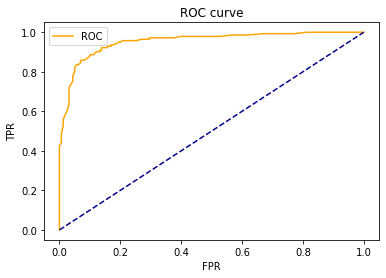

In [82]:
# 함수 호출
plot_roc_curve(fpr, tpr)